# Лабораторная работа №3

## Задание: 

Разработать программу на языке высокого уровня, реализующую алгаритм Крускала построения минимального остового дерева. На вход в программу поступает файл, содержащий списки смежности вершин в формате CSV, на выходе программа должна давать списки смежностей остовного дерева в аналогичном формате

In [1]:
import random
import graphviz
import csv

In [2]:
def grviz(adj):
    graph = graphviz.Graph() 
    for a in adj.keys():
        for b in adj[a]:
            graph.edge(str(a),str(b[0]),label = str(b[1]))
    return graph

In [3]:
def kruskal(edge_list):
    #(v,w,вес)
    sorted_edge_list = sorted(edge_list, key = (lambda l: l[2]))
    connected_components = []
    spanning_tree = []
    for edge_ in sorted_edge_list:
        v,w,_= edge_
        flag = False
        not_found = True
        for cc in connected_components:
            if (v in cc) and (w not in cc):
                flag = True
                for cc2 in connected_components:
                    if w in cc2:
                        [cc.append(x) for x in cc2]
                        connected_components.remove(cc2)
                        spanning_tree.append(edge_)
                        flag = False
                        break
                if flag:
                    cc.append(w)
                    spanning_tree.append(edge_)
                not_found=False
            elif (w in cc) and (v not in cc):
                flag = True
                for cc2 in connected_components:
                    if v in cc2:
                        [cc.append(x) for x in cc2]
                        connected_components.remove(cc2)
                        spanning_tree.append(edge_)
                        flag = False
                        break
                if flag:
                    cc.append(v)
                    spanning_tree.append(edge_)
                not_found=False
            elif (w in cc) and (v in cc):
                not_found=False
                break
        if not_found:
            connected_components.append([v,w])
            spanning_tree.append(edge_)
    return spanning_tree

def edges2adj(edges):
    adj = {}
    for x, y, z in edges:
        if x in adj.keys():
            adj[x].append([y,z])
        else:
            adj[x] = [[y, z]]
    return adj

def edges2adj2(edges):
    adj = {}
    for x,y,z in edges:
        if x in adj.keys():
            adj[x].append([y,z])
        else:
            adj[x] = [[y,z]]
    return adj

def adj2edges(adj):
    edges = []
    for a in adj.keys():
        for x in adj[a]:
            edges.append((a,x[0],x[1]))
    return edges


In [4]:
def csvwrite(T,FILENAME):
    with open(FILENAME, "w", newline="") as file:
        wr = csv.writer(file)    
        for key,values in T.items():
            Time = []
            Time.append (key)
            Time += values
            wr.writerow(Time)          

In [5]:
def csvread(FILENAME):
    adj = {}
    with open(FILENAME) as file:
        reader = csv.reader(file)
        for row in reader:
            st = int(row[0])
            adj[st]=[]
            for a in row[1:]:
                Time = []
                for b in a:
                    try:
                        Time.append(int(b))
                    except:
                        continue
                adj[st].append(Time)
    return adj

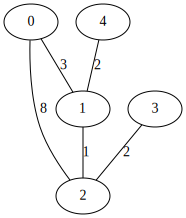

In [6]:
adj = csvread("vgraph.csv")
graph = grviz(adj)
graph

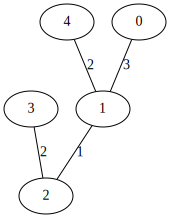

In [7]:
edge_list = adj2edges(adj)   
#print (edges2adj(edge_list))
st = kruskal(edge_list)
adj = edges2adj2(st)
csvwrite(adj, "result.csv")
graph = grviz(adj)
graph